<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Regresión Linear - Ejemplo </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

En este ejemplo veremos cómo implementar una regresión logística para predecir una variable numérica. Volveremos a utilizar el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato.

Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

En esta notebook vamos a tratar de estimar una función lineal que modele el cambio a través del tiempo de la libertad humana y la económica.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.set_context(context='talk', font_scale=1.2)

In [3]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [4]:
dataset = pandas.read_csv('../datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

En el práctico habíamos trabajado sobre las variables `ef_score` y `hf_score`, que hacen referencia a los índices de libertad humana y libertad económica de cada páis. Además, sabemos que el dataset incluye una medición del índice anual por país desde 2008 hasta 2016, aunque hay datos faltantes de algunos indicadores.

La motivación de este análisis comienza con este gráfico, que muestra una tendencia decreciente de la libertad humana y una tendencia ascendiente de la libertad económica.

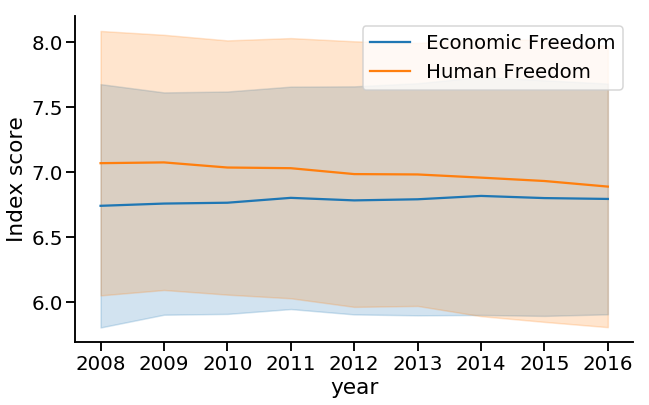

In [5]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset,
                 x='year', y='ef_score',
                 label='Economic Freedom', ci='sd')
seaborn.lineplot(data=dataset,
                 x='year', y='hf_score',
                 label='Human Freedom', ci='sd')
plt.legend()
plt.ylabel('Index score')
seaborn.despine()

Este fenómeno podría estar dado por varios factores:
  * Hay pocos países en los que la libertad humana está decreciendo, pero su libertad económica se mantiene constante.
  * Los países para los cuales sube la libertad económica decrecen en libertad humana.
  * **¿Otras?**

Veamos qué sucede en Argentina. Si graficamos ambas variables, vemos que "van bajando". Formalmente, esto significa que hay la recta que las modela tiene una pendiente negativa.

**¿Y esto, es grave?**

/home/milagro/anaconda3/envs/diplodatos/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(2008, 2016)

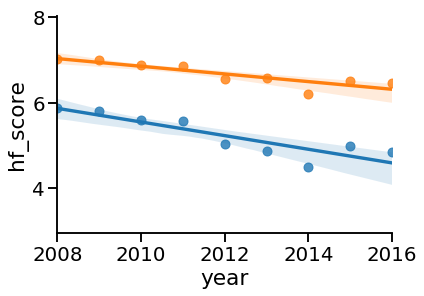

In [6]:
seaborn.regplot(data=dataset[(dataset.ISO_code == 'ARG')],
                    x='year', y='ef_score')
seaborn.regplot(data=dataset[(dataset.ISO_code == 'ARG')],
                    x='year', y='hf_score')
seaborn.despine()
plt.xlim(2008, 2016)

Podemos graficar varios países, pero es difícil comparar visualmente entre tantas variables, qué países "decrecen" más rápido que otros.

Scores de libertad para Medio Oriente


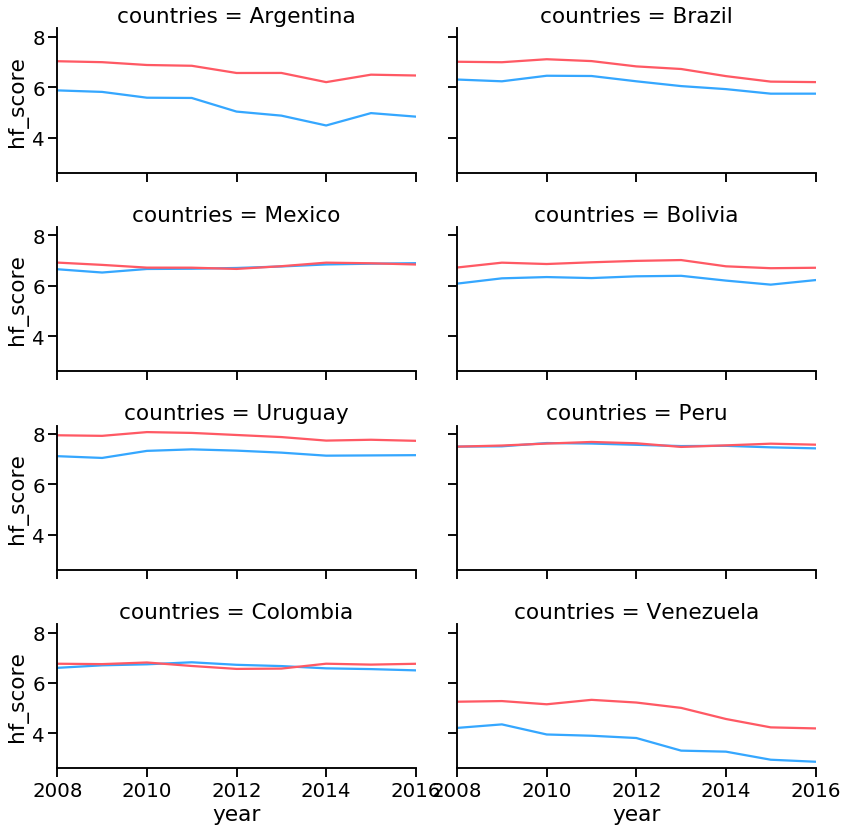

In [7]:
countries = ['Argentina', 'Brazil', 'Mexico', 'Bolivia',
             'Uruguay', 'Peru', 'Colombia', 'Venezuela']
g = seaborn.FacetGrid(dataset, col="countries",
                      margin_titles=True, aspect=2, col_wrap=2,
                      col_order=countries)
g.map(seaborn.lineplot, "year", "ef_score", color=BLUE)
g.map(seaborn.lineplot, "year", "hf_score", color=RED)
g.set(xlim=(2008, 2016))

#g.map(seaborn.regplot, "hf_score", "ef_score", color=BLUE)
print('Scores de libertad para Medio Oriente');

Para poder comparar la situación de Argentina con otros países, podemos comparar la pendiente de la recta de la regresión lineal. A partir del gráfico anterior pudimos ver que la mayoría de los países tiene tendencias similares y que se pueden estimar con una recta sin perder generalidad. Esto es posible también, en cierta medida, porque tenemos pocos puntos para estimar.

## Regresión lineal

Queremos ver cuál es el coeficiente que relaciona ambas variables. Básicamente, queremos escribir

$$ef = a * year + b$$

Reescribiremos esto como una función $e$ (por economic), cuyo parámetro es el valor $y$ (por year):

$$e(y) = a * y + b$$

Vamos a describir los ejemplos como pares $(x_y, x_e)$, donde $x_y$ denota el `year` y $x_e$ denota `ef_score`. 

Para encontrar la recta $e$ que mejor describe los datos, queremos minimizar el error cuadrático medio, definido como:

$$mse = \frac{1}{|X|} \sum_{x \in X} (e(x_y) - x_e)^2 $$

Recordemos que para minimizar una función, una buena opción es comenzar por buscar los puntos estacionarios, donde la derivada se anula. Por suerte, la función $mse$ es convexa, y por lo tanto tiene todos sus puntos estacionarios son minimizadores. El minimizador es el valor de los parámetros $a$ y $b$ que minimizan la función. Ahora, en hemos cambiado nuestras "variables", lo que buscamos es encontrar la función adecuada, por lo tanto lo que cambia son los valores de los parámetros que definen la función. 

Primero, notemos que:

$$\frac{\partial}{\partial a}e(y) = x_h$$

$$\frac{\partial}{\partial b}e(y) = 1$$

Con eso, calculamos las derivadas parciales para cada parámetro de la función $mse$.

$$\frac{\partial}{\partial a}mse = \frac{2}{|X|} \sum_{x \in X} (e(x_h) - x_e) \frac{\partial}{\partial a} (e(x_h) - x_e) = \frac{2}{|X|} \sum_{x \in X} (e(x_h) - x_e) e_h $$

$$\frac{\partial}{\partial b}mse = \frac{2}{|X|} \sum_{x \in X} \frac{\partial}{\partial b} e(x_h) - x_e = \frac{2}{|X|} \sum_{x \in X} e(x_h) - x_e $$


A pesar del formulerío, es bastante simple. Sólo reemplazamos $mse$ por su definición, y luego aplicamos un par de reglas como "la derivada de la suma es la suma de las derivadas", la regla de la cadena, o la definición de la derivada de la función cuadrática.

Una vez que tenemos esos valores, tenemos que igualarlos a cero para encontrar los puntos estacionarios.

\begin{align}
 \frac{\partial}{\partial a}mse &= \frac{2}{|X|} \sum_{x \in X} (e(x_y) - x_e) x_y = 0 \\
                                &\Rightarrow a = \frac{\bar{x_y} \bar{x_e} - \overline{x_yx_e}}{(\bar{x_y})^2 - \overline{x_y^2}} 
\end{align}

\begin{align}
 \frac{\partial}{\partial b}mse &= \frac{2}{|X|} \sum_{x \in X} e(x_y) - x_e = 0 \\
                                &\Rightarrow b = \bar{x_e} - a \bar{x_y}
\end{align}

Donde $\bar{x}$ es la media del valor para todos los ejemplos. Vamos a confiar en estas fórmulas, pero una demostración de las mismas está en:

https://medium.freecodecamp.org/machine-learning-mean-squared-error-regression-line-c7dde9a26b93

In [8]:
def estimate_params(X_y, X_e):
    """Caculates the value of a using all the examples."""
    num = numpy.mean(X_y)*numpy.mean(X_e) - numpy.mean(numpy.multiply(X_y, X_e))
    denom = numpy.mean(X_y)**2 - numpy.mean(numpy.multiply(X_y, X_y))
    a = num / denom
    b = numpy.mean(X_e) - a * numpy.mean(X_y)
    return a, b

In [9]:
# Asumimos que todos los registros que tienen hf_score tienen el año.
a, b = estimate_params(
    dataset[(dataset.ISO_code == 'ARG') & (dataset.hf_score.notnull())].year.dropna(),
    dataset[dataset.ISO_code == 'ARG'].hf_score)
a, b

(-0.08980244453559766, 187.35957478506694)

In [10]:
def base_linear_regression(x_y, a):
    return a * x_y

In [11]:
def regplot2(data, x, y, reg_func, **reg_func_args):
    """Plots the x, y columns from data and builds a line with the regression reg_func."""
    seaborn.scatterplot(data=data, x=x, y=y, color=BLUE)
    minimum = data[x].min()
    maximum = data[x].max()
    plt.plot([minimum, maximum],
             [reg_func(minimum, **reg_func_args),
              reg_func(maximum, **reg_func_args)],
             color=GREEN)
    seaborn.despine()
    plt.show()

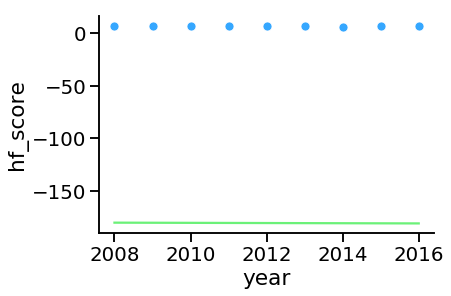

In [12]:
regplot2(dataset[dataset.ISO_code == 'ARG'],
         x='year', y='hf_score', reg_func=base_linear_regression, a=a)

Vemos que la recta va en el sentido correcto, pero está demasiado abajo. Esto ocurre porque no hemos usado el término de bias.

Redefinamos entonces la regresión logística

In [13]:
def linear_regression(x_y, a, b):
    return a * x_y + b

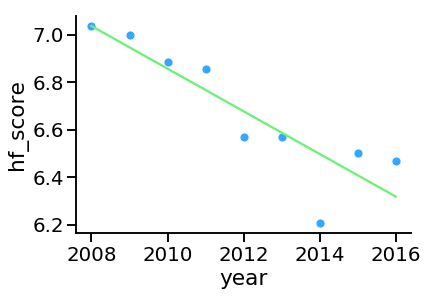

In [14]:
regplot2(dataset[dataset.ISO_code == 'ARG'],
         x='year', y='hf_score', reg_func=linear_regression, a=a, b=b)

## Continuamos el análisis

Perfecto! Ahora podemos calcular las pendientes y los biases para todos los años, para regresiones que estimen el `hf_score`.

In [15]:
def build_regressions(data, x_var='year', y_var='hf_score'):
    records = []
    for code in data.ISO_code.unique():
        record = [code, data[data.ISO_code == code].region.values[0],
                  data[data.ISO_code == code].countries.values[0]]
        y_data = data[data.ISO_code == code][y_var].dropna()
        # Comprobamos que hay datos en el intervalo
        if len(y_data) <= 1:
            continue
        x_data = data[(data.ISO_code == code) & (data[y_var].notnull())][x_var].dropna()
        # Estimamos los parámetros
        a, b = estimate_params(x_data, y_data)
        # Calculamos el error cuadrático medio de la regresión lineal estimada
        predictions = numpy.apply_along_axis(
            lambda x: linear_regression(x, a, b), 0, x_data)
        mse = numpy.mean(numpy.power(predictions - y_data, 2))
        record.extend([a, b, mse])
        # Agregamos el registro
        records.append(record)
    return pandas.DataFrame.from_records(
        records, columns=['ISO_code', 'region', 'country', 'slope', 'bias', 'mse']
    )

In [16]:
hf_regressions = build_regressions(dataset).set_index('ISO_code')
hf_regressions[:10]

,region,country,slope,bias,mse
ISO_code,,,,,
ALB,Eastern Europe,Albania,0.003464,0.553010,0.004710
DZA,Middle East & North Africa,Algeria,-0.005140,15.481777,0.001587
AGO,Sub-Saharan Africa,Angola,0.106828,-209.439312,0.046649
ARG,Latin America & the Caribbean,Argentina,-0.089802,187.359575,0.015508
ARM,Caucasus & Central Asia,Armenia,-0.035400,78.639050,0.005959
AUS,Oceania,Australia,-0.007955,24.619030,0.001704
AUT,Western Europe,Austria,0.019503,-30.815546,0.002145
AZE,Caucasus & Central Asia,Azerbaijan,-0.036932,80.460165,0.004310
BHS,Latin America & the Caribbean,Bahamas,-0.060169,128.618738,0.003914


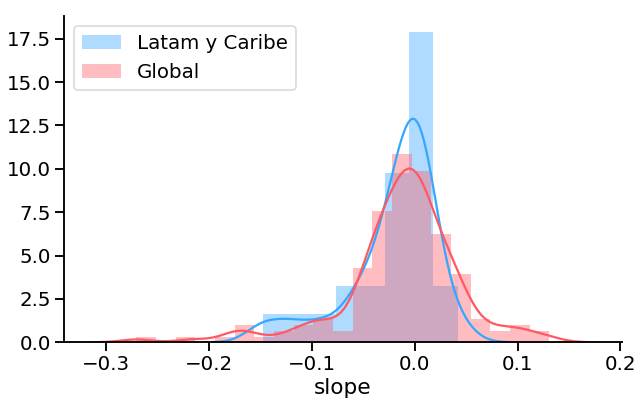

In [17]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    hf_regressions[hf_regressions.region == 'Latin America & the Caribbean'].slope,
    color=BLUE, label='Latam y Caribe')
seaborn.distplot(hf_regressions.slope, color=RED, label='Global')
plt.legend()
seaborn.despine()

In [18]:
def plot_regressions(regressions):
    plt.figure(figsize=(10,6))
    colors = seaborn.color_palette("cubehelix", len(regressions))
    for color, (year, row) in zip(colors, regressions.iterrows()):
        minimum, maximum = 2008, 2016
        plt.plot([minimum, maximum],
                 [linear_regression(minimum, row['slope'], row['bias']),
                  linear_regression(maximum, row['slope'], row['bias'])],
                 color=color, label=str(year), linestyle='--')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    seaborn.despine()

(4, 9)

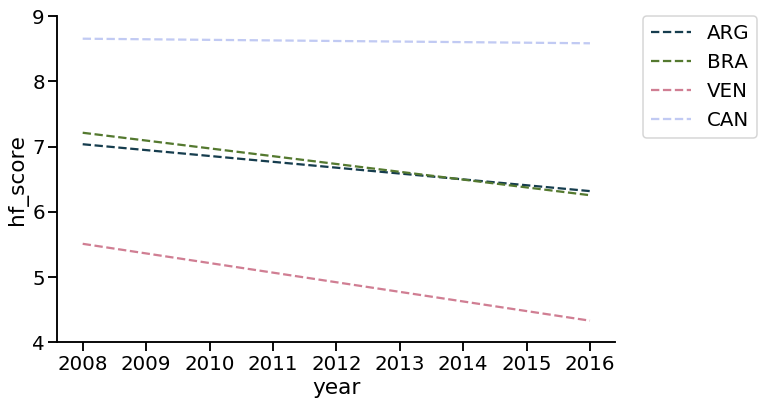

In [19]:
plot_regressions(hf_regressions.loc[['ARG', 'BRA', 'VEN', 'CAN']])
plt.xlabel('year')
plt.ylabel('hf_score')
plt.ylim(4, 9)

### Libertad Económica

In [20]:
ef_regressions = build_regressions(dataset, y_var='ef_score').set_index('ISO_code')
ef_regressions[:10]

,region,country,slope,bias,mse
ISO_code,,,,,
ALB,Eastern Europe,Albania,0.037167,-67.430444,0.006890
DZA,Middle East & North Africa,Algeria,-0.031167,67.739556,0.003564
AGO,Sub-Saharan Africa,Angola,0.061500,-118.595778,0.050513
ARG,Latin America & the Caribbean,Argentina,-0.159667,326.482667,0.045977
ARM,Caucasus & Central Asia,Armenia,0.005000,-2.425556,0.005080
AUS,Oceania,Australia,-0.006667,21.408889,0.001528
AUT,Western Europe,Austria,-0.007333,22.396889,0.000770
AZE,Caucasus & Central Asia,Azerbaijan,0.053833,-102.077111,0.007016
BHS,Latin America & the Caribbean,Bahamas,-0.024833,57.344667,0.003578


Text(0, 0.5, 'ef_score')

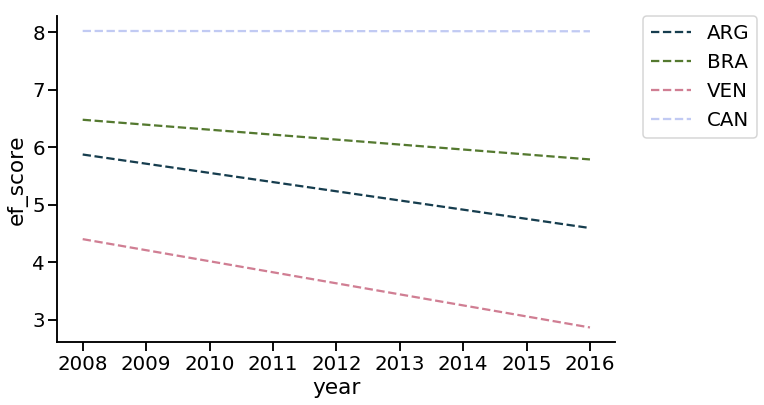

In [21]:
plot_regressions(ef_regressions.loc[['ARG', 'BRA', 'VEN', 'CAN']])
plt.xlabel('year')
plt.ylabel('ef_score')

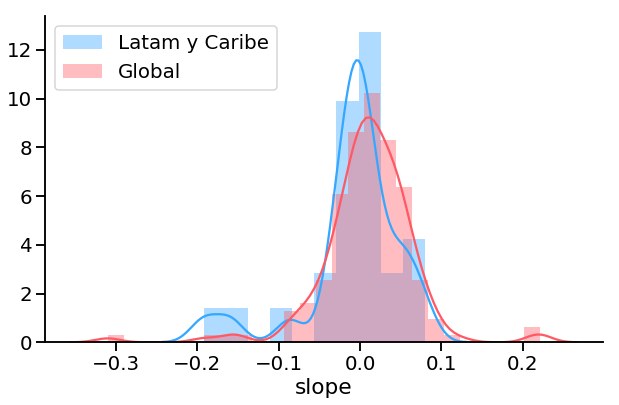

In [22]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    ef_regressions[ef_regressions.region == 'Latin America & the Caribbean'].slope,
    color=BLUE, label='Latam y Caribe')
seaborn.distplot(ef_regressions.slope, color=RED, label='Global')
plt.legend()
seaborn.despine()

## Análisis conjunto

**¿Cuáles es el 10% de países en los que la libertad humana disminuye más rápidamente?**

In [23]:
quantil = hf_regressions.slope.quantile(0.1)
hf_regressions[hf_regressions.slope < quantil].country

ISO_code
ARG            Argentina
BRA               Brazil
BRN    Brunei Darussalam
BDI              Burundi
EGY                Egypt
GRC               Greece
LBR              Liberia
LBY                Libya
NER                Niger
SYR                Syria
TJK           Tajikistan
THA             Thailand
TLS          Timor-Leste
UKR              Ukraine
VEN            Venezuela
YEM          Yemen, Rep.
Name: country, dtype: object

**¿Cuáles es el 10% de países en los que la libertad económica disminuye más rápidamente?**

In [24]:
quantil = ef_regressions.slope.quantile(0.1)
ef_regressions[ef_regressions.slope < quantil].country

ISO_code
ARG          Argentina
BRA             Brazil
EGY              Egypt
FJI               Fiji
GHA              Ghana
GRC             Greece
IRN               Iran
KWT             Kuwait
LBR            Liberia
MWI             Malawi
NAM            Namibia
PNG    Pap. New Guinea
SYR              Syria
TUN            Tunisia
VEN          Venezuela
ZMB             Zambia
Name: country, dtype: object

**¿Cuáles son los paises en los que la libertad económica aumenta pero la libertad humana disminuye (rápidamente)?**

In [25]:
all_countries = dataset.ISO_code.unique()
codes = []
for code in all_countries:
    if (code in ef_regressions.index and code in hf_regressions.index and
        ef_regressions.loc[code].slope > 0.02 and
        hf_regressions.loc[code].slope < -0.02):
        codes.append(code)
ef_regressions.loc[codes].country

ISO_code
AZE        Azerbaijan
BDI           Burundi
COD    Congo, Dem. R.
GMB       Gambia, The
MKD         Macedonia
NIC         Nicaragua
NER             Niger
RUS            Russia
TJK        Tajikistan
TLS       Timor-Leste
YEM       Yemen, Rep.
Name: country, dtype: object

# Errores

Calculamos el mse pero nunca lo usamos. Veamos cómo son los países para los que la regresión linear no produce una buena aproximación

In [26]:
hf_regressions.mse.sort_values()[-10:]

ISO_code
VEN    0.041111
BRN    0.042008
CMR    0.042355
TGO    0.043840
COD    0.046000
AGO    0.046649
UKR    0.068001
BDI    0.074905
SYR    0.087395
IRN    0.100911
Name: mse, dtype: float64

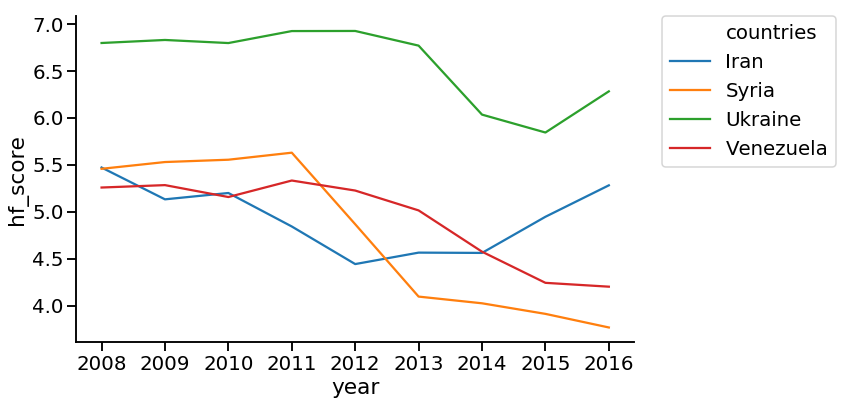

In [28]:
plt.figure(figsize=(10,6))
countries = ['SYR', 'VEN', 'IRN', 'UKR']
seaborn.lineplot(data=dataset[dataset.ISO_code.isin(countries)], x='year', y='hf_score',
                 hue='countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Claramente se ve que estas funciones no podían ser estimadas satisfactoriamente con una recta, pero aún así, la tendencia general (descendiente o ascendiente) habría sido aproximada